# Fossil Photography Usability Test Analysis

This notebook analyzes survey responses from the usability testing of three prototype interfaces:
- **Prototype A (Baseline)**: Basic camera interface with no feedback
- **Prototype B (Post-Capture)**: Feedback provided after photo is taken
- **Prototype C (Real-Time)**: Live feedback during photo capture

## Analysis Goals
1. Determine which prototype is most usable
2. Compare user satisfaction across prototypes
3. Analyze System Usability Scale (SUS) scores
4. Identify strengths and weaknesses of each prototype

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

print("Libraries imported successfully")

Libraries imported successfully


## 1. Load and Clean Data

Load the survey responses and prepare the data for analysis.

In [2]:
# Load survey data
df = pd.read_csv('Fossil Photography Usability Test.csv')

print(f"Total responses: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print(f"\nFirst few column names:")
for i, col in enumerate(df.columns[:10]):
    print(f"{i+1}. {col}")

Total responses: 7
Number of columns: 71

First few column names:
1. Timestamp
2. What is the username you entered in the Fossil Photography app?
3. What age group are you in?
4. What is your gender?
5. How often do you contribute to scientific research or citizen-science projects (e.g., by submitting images or observations of specimens)? 
6. For Prototype A, how easy was it to capture an acceptable fossil photograph?
(An acceptable photo is clear, well-lit, focused on the fossil with a size reference like a coin.)
7. For Prototype A, how clear were the instructions?
8. I felt motivated to adjust my photograph based on the guidance provided by Prototype A
9. For Prototype, B how easy was it to capture an acceptable fossil photograph?
(An acceptable photo is clear, well-lit, focused on the fossil with a size reference like a coin.)
10. For Prototype B, how clear were the instructions?


In [3]:
# Create shorter column names for easier analysis
column_mapping = {
    'For Prototype A, how easy was it to capture an acceptable fossil photograph?\n(An acceptable photo is clear, well-lit, focused on the fossil with a size reference like a coin.)': 'ease_A',
    'For Prototype A, how clear were the instructions?': 'clarity_A',
    'I felt motivated to adjust my photograph based on the guidance provided by Prototype A': 'motivation_A',
    'For Prototype, B how easy was it to capture an acceptable fossil photograph?\n(An acceptable photo is clear, well-lit, focused on the fossil with a size reference like a coin.)': 'ease_B',
    'For Prototype B, how clear were the instructions?': 'clarity_B',
    'For Prototype B, how helpful was the feedback in improving your photo?': 'helpful_B',
    'I felt motivated to adjust my photograph based on the guidance provided by Prototype B': 'motivation_B',
    'For Prototype C, how easy was it to capture an acceptable fossil photograph?\n(An acceptable photo is clear, well-lit, focused on the fossil with a size reference like a coin.)': 'ease_C',
    'For Prototype C, how clear were the instructions?': 'clarity_C',
    'For Prototype C, how helpful was the feedback in improving your photo?': 'helpful_C',
    'I felt motivated to adjust my photograph based on the guidance provided by Prototype C.': 'motivation_C',
}

# Find SUS question columns (System Usability Scale)
sus_columns = {}
for col in df.columns:
    if '[A]' in col or '[B]' in col or '[C]' in col:
        # Extract the question and prototype
        if 'I think that I would like to use this prototype frequently' in col:
            proto = col[-2]
            sus_columns[col] = f'sus1_{proto}'
        elif 'I found the prototype unnecessarily complex' in col:
            proto = col[-2]
            sus_columns[col] = f'sus2_{proto}'
        elif 'I thought the prototype was easy to use' in col:
            proto = col[-2]
            sus_columns[col] = f'sus3_{proto}'
        elif 'I think that I would need the support of a technical person' in col:
            proto = col[-2]
            sus_columns[col] = f'sus4_{proto}'
        elif 'I found the various functions in this prototype were well integrated' in col:
            proto = col[-2]
            sus_columns[col] = f'sus5_{proto}'
        elif 'I thought there was too much inconsistency' in col:
            proto = col[-2]
            sus_columns[col] = f'sus6_{proto}'
        elif 'I would imagine that most people would learn to use this prototype very quickly' in col:
            proto = col[-2]
            sus_columns[col] = f'sus7_{proto}'
        elif 'I found the prototype very difficult to use' in col:
            proto = col[-2]
            sus_columns[col] = f'sus8_{proto}'
        elif 'I felt very confident using the prototype' in col:
            proto = col[-2]
            sus_columns[col] = f'sus9_{proto}'
        elif 'I needed to learn a lot of things before I could get going' in col:
            proto = col[-2]
            sus_columns[col] = f'sus10_{proto}'

# Combine all mappings
all_mappings = {**column_mapping, **sus_columns}

# Rename columns
df_clean = df.rename(columns=all_mappings)

print(f"Mapped {len(all_mappings)} columns to shorter names")
print("\nSample of renamed columns:")
for old, new in list(all_mappings.items())[:5]:
    print(f"  {new}")

Mapped 41 columns to shorter names

Sample of renamed columns:
  ease_A
  clarity_A
  motivation_A
  ease_B
  clarity_B


## 2. Overall Usability Comparison

Compare ease of use, instruction clarity, and motivation across all three prototypes.

In [4]:
# Convert text responses to numeric scores
# Very easy=5, Somewhat easy=4, Neither=3, Somewhat difficult=2, Very difficult=1
ease_mapping = {
    'Very easy': 5,
    'Somewhat easy': 4,
    'Neither easy nor difficult': 3,
    'Somewhat difficult': 2,
    'Very difficult': 1
}

clarity_mapping = {
    'Very clear': 5,
    'Somewhat clear': 4,
    'Neither clear nor unclear': 3,
    'Somewhat unclear': 2,
    'Very unclear': 1
}

helpful_mapping = {
    'Very helpful': 5,
    'Somewhat helpful': 4,
    'Neither helpful nor unhelpful': 3,
    'Somewhat unhelpful': 2,
    'Very unhelpful': 1
}

motivation_mapping = {
    'Strongly agree': 5,
    'Somewhat agree': 4,
    'Neither agree nor disagree': 3,
    'Somewhat disagree': 2,
    'Strongly disagree': 1
}

# Apply mappings
df_clean['ease_A_num'] = df_clean['ease_A'].map(ease_mapping)
df_clean['ease_B_num'] = df_clean['ease_B'].map(ease_mapping)
df_clean['ease_C_num'] = df_clean['ease_C'].map(ease_mapping)

df_clean['clarity_A_num'] = df_clean['clarity_A'].map(clarity_mapping)
df_clean['clarity_B_num'] = df_clean['clarity_B'].map(clarity_mapping)
df_clean['clarity_C_num'] = df_clean['clarity_C'].map(clarity_mapping)

df_clean['motivation_A_num'] = df_clean['motivation_A'].map(motivation_mapping)
df_clean['motivation_B_num'] = df_clean['motivation_B'].map(motivation_mapping)
df_clean['motivation_C_num'] = df_clean['motivation_C'].map(motivation_mapping)

df_clean['helpful_B_num'] = df_clean['helpful_B'].map(helpful_mapping)
df_clean['helpful_C_num'] = df_clean['helpful_C'].map(helpful_mapping)

# Calculate summary statistics
metrics = {
    'Ease of Use': ['ease_A_num', 'ease_B_num', 'ease_C_num'],
    'Clarity': ['clarity_A_num', 'clarity_B_num', 'clarity_C_num'],
    'Motivation': ['motivation_A_num', 'motivation_B_num', 'motivation_C_num']
}

summary_data = []
for metric_name, cols in metrics.items():
    for col in cols:
        prototype = col.split('_')[1].upper()
        summary_data.append({
            'Metric': metric_name,
            'Prototype': prototype,
            'Mean': df_clean[col].mean(),
            'Median': df_clean[col].median(),
            'Std': df_clean[col].std(),
            'N': df_clean[col].notna().sum()
        })

summary_df = pd.DataFrame(summary_data)
print("Summary Statistics by Prototype:")
print(summary_df.to_string(index=False))

Summary Statistics by Prototype:
     Metric Prototype     Mean  Median      Std  N
Ease of Use         A 3.666667     4.0 1.527525  3
Ease of Use         B 2.000000     2.0 1.000000  3
Ease of Use         C 2.000000     2.0 1.000000  3
    Clarity         A 3.333333     4.0 1.154701  3
    Clarity         B 4.000000     4.0 0.000000  3
    Clarity         C 4.333333     4.0 0.577350  3
 Motivation         A 2.333333     2.0 0.577350  3
 Motivation         B 4.000000     4.0 1.000000  3
 Motivation         C 3.000000     2.0 1.732051  3


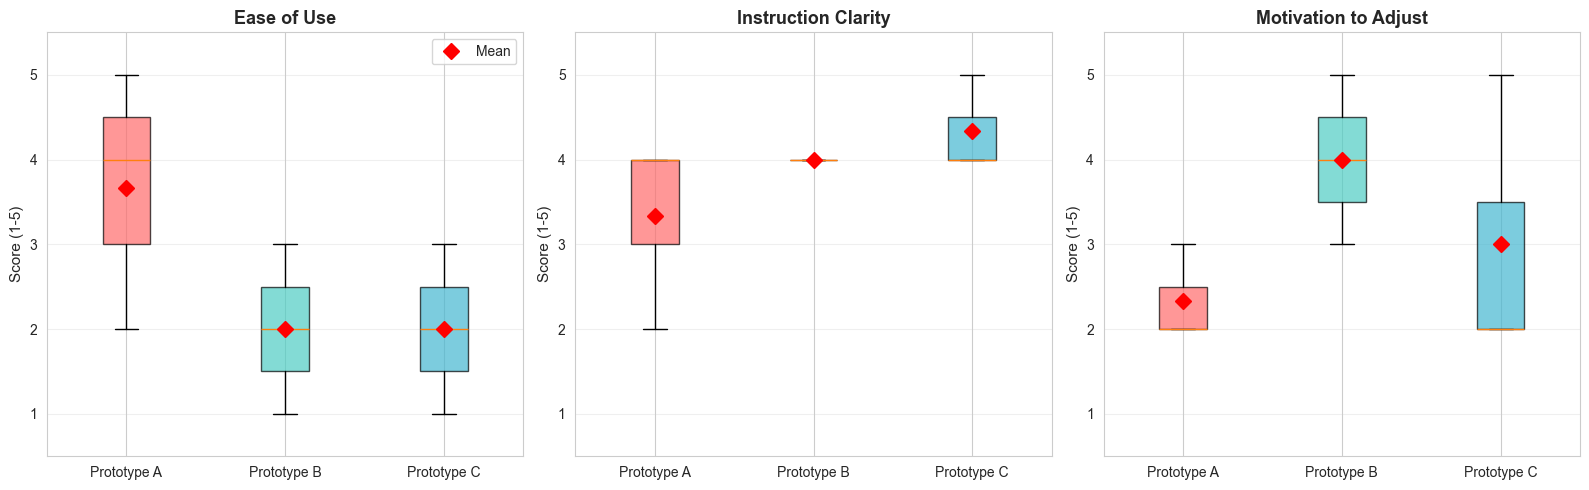


Mean Scores (1-5 scale, higher is better):

Ease of Use:
  Prototype A: 3.67
  Prototype B: 2.00
  Prototype C: 2.00

Instruction Clarity:
  Prototype A: 3.33
  Prototype B: 4.00
  Prototype C: 4.33

Motivation to Adjust:
  Prototype A: 2.33
  Prototype B: 4.00
  Prototype C: 3.00


In [5]:
# Visualize comparison across prototypes
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

metrics_to_plot = [
    ('Ease of Use', ['ease_A_num', 'ease_B_num', 'ease_C_num']),
    ('Instruction Clarity', ['clarity_A_num', 'clarity_B_num', 'clarity_C_num']),
    ('Motivation to Adjust', ['motivation_A_num', 'motivation_B_num', 'motivation_C_num'])
]

for idx, (title, cols) in enumerate(metrics_to_plot):
    ax = axes[idx]
    
    data_to_plot = []
    labels = []
    for col in cols:
        data_to_plot.append(df_clean[col].dropna())
        proto = col.split('_')[1].upper()
        labels.append(f'Prototype {proto}')
    
    bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True)
    
    # Color boxes
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax.set_ylabel('Score (1-5)', fontsize=11)
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.set_ylim([0.5, 5.5])
    ax.grid(axis='y', alpha=0.3)
    
    # Add mean markers
    means = [df_clean[col].mean() for col in cols]
    ax.plot(range(1, len(means)+1), means, 'D', color='red', markersize=8, label='Mean', zorder=5)

axes[0].legend()
plt.tight_layout()
plt.show()

# Print mean scores for quick reference
print("\nMean Scores (1-5 scale, higher is better):")
print("="*60)
for title, cols in metrics_to_plot:
    print(f"\n{title}:")
    for col in cols:
        proto = col.split('_')[1].upper()
        mean_val = df_clean[col].mean()
        print(f"  Prototype {proto}: {mean_val:.2f}")

## 3. System Usability Scale (SUS) Analysis

Calculate and compare SUS scores for each prototype. SUS is a standardized questionnaire with scores ranging from 0-100, where higher scores indicate better usability.

In [6]:
# Calculate SUS scores for each prototype
def calculate_sus_score(row, prototype):
    """
    Calculate SUS score for a prototype
    SUS score = sum of contributions * 2.5
    Odd items (positive): contribution = response - 1
    Even items (negative): contribution = 5 - response
    """
    sus_items = []
    
    for i in range(1, 11):
        col = f'sus{i}_{prototype}'
        if col in row.index and pd.notna(row[col]):
            val = row[col]
            if i % 2 == 1:  # Odd items (positive statements)
                sus_items.append(val - 1)
            else:  # Even items (negative statements - reverse scored)
                sus_items.append(5 - val)
    
    if len(sus_items) == 10:
        return sum(sus_items) * 2.5
    else:
        return np.nan

# Calculate SUS scores
df_clean['sus_score_A'] = df_clean.apply(lambda row: calculate_sus_score(row, 'A'), axis=1)
df_clean['sus_score_B'] = df_clean.apply(lambda row: calculate_sus_score(row, 'B'), axis=1)
df_clean['sus_score_C'] = df_clean.apply(lambda row: calculate_sus_score(row, 'C'), axis=1)

# SUS score summary
sus_summary = pd.DataFrame({
    'Prototype': ['A (Baseline)', 'B (Post-Capture)', 'C (Real-Time)'],
    'Mean SUS': [
        df_clean['sus_score_A'].mean(),
        df_clean['sus_score_B'].mean(),
        df_clean['sus_score_C'].mean()
    ],
    'Median SUS': [
        df_clean['sus_score_A'].median(),
        df_clean['sus_score_B'].median(),
        df_clean['sus_score_C'].median()
    ],
    'Std Dev': [
        df_clean['sus_score_A'].std(),
        df_clean['sus_score_B'].std(),
        df_clean['sus_score_C'].std()
    ],
    'N': [
        df_clean['sus_score_A'].notna().sum(),
        df_clean['sus_score_B'].notna().sum(),
        df_clean['sus_score_C'].notna().sum()
    ]
})

print("System Usability Scale (SUS) Scores")
print("="*70)
print(sus_summary.to_string(index=False))
print("\nSUS Score Interpretation:")
print("  > 80: Excellent")
print("  68-80: Good")
print("  50-68: OK")
print("  < 50: Poor")

System Usability Scale (SUS) Scores
       Prototype  Mean SUS  Median SUS   Std Dev  N
    A (Baseline)      60.0        75.0 32.691742  3
B (Post-Capture)      72.5        77.5 13.228757  3
   C (Real-Time)      75.0        77.5  4.330127  3

SUS Score Interpretation:
  > 80: Excellent
  68-80: Good
  50-68: OK
  < 50: Poor


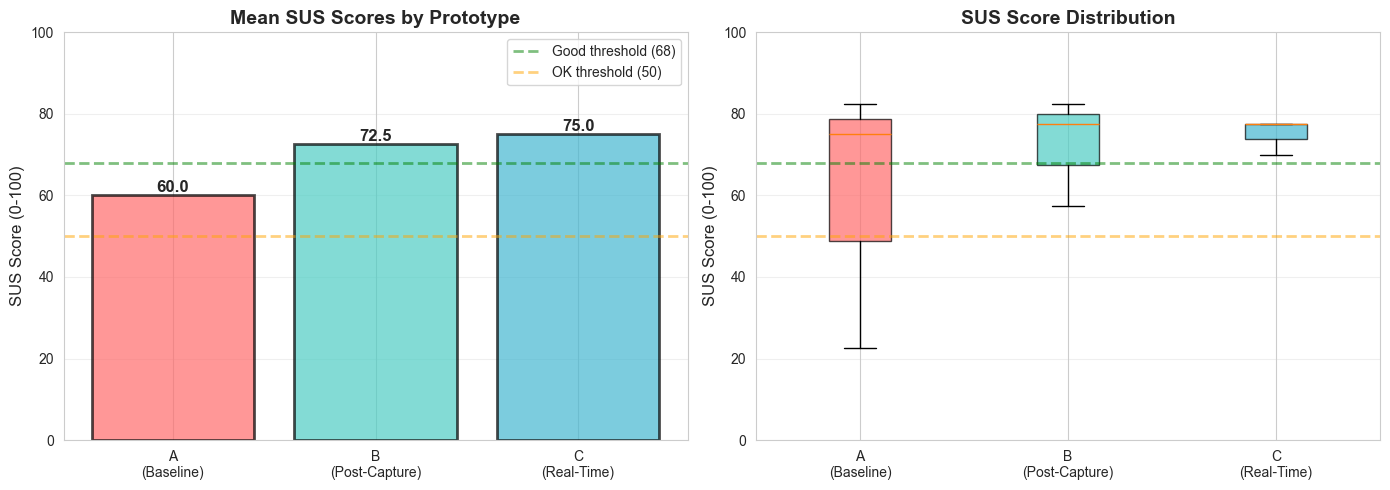

In [7]:
# Visualize SUS scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart with means
prototypes = ['A\n(Baseline)', 'B\n(Post-Capture)', 'C\n(Real-Time)']
means = [df_clean['sus_score_A'].mean(), df_clean['sus_score_B'].mean(), df_clean['sus_score_C'].mean()]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

bars = ax1.bar(prototypes, means, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax1.axhline(y=68, color='green', linestyle='--', linewidth=2, alpha=0.5, label='Good threshold (68)')
ax1.axhline(y=50, color='orange', linestyle='--', linewidth=2, alpha=0.5, label='OK threshold (50)')
ax1.set_ylabel('SUS Score (0-100)', fontsize=12)
ax1.set_title('Mean SUS Scores by Prototype', fontsize=14, fontweight='bold')
ax1.set_ylim([0, 100])
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, mean in zip(bars, means):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{mean:.1f}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Box plot
sus_data = [
    df_clean['sus_score_A'].dropna(),
    df_clean['sus_score_B'].dropna(),
    df_clean['sus_score_C'].dropna()
]

bp = ax2.boxplot(sus_data, labels=prototypes, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.axhline(y=68, color='green', linestyle='--', linewidth=2, alpha=0.5)
ax2.axhline(y=50, color='orange', linestyle='--', linewidth=2, alpha=0.5)
ax2.set_ylabel('SUS Score (0-100)', fontsize=12)
ax2.set_title('SUS Score Distribution', fontsize=14, fontweight='bold')
ax2.set_ylim([0, 100])
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Statistical Testing

Use repeated measures ANOVA (or Friedman test for non-normal data) to determine if there are significant differences between prototypes.

In [8]:
# Repeated measures ANOVA on SUS scores
from scipy.stats import friedmanchisquare, wilcoxon

# Check for complete cases (participants who completed all three prototypes)
df_complete = df_clean[['sus_score_A', 'sus_score_B', 'sus_score_C']].dropna()

print(f"Number of participants with complete SUS data: {len(df_complete)}\n")

# Friedman test (non-parametric alternative to repeated measures ANOVA)
stat, p_value = friedmanchisquare(
    df_complete['sus_score_A'],
    df_complete['sus_score_B'],
    df_complete['sus_score_C']
)

print("="*60)
print("FRIEDMAN TEST (Repeated Measures)")
print("="*60)
print(f"Chi-square statistic: {stat:.3f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("\\nSIGNIFICANT DIFFERENCE found between prototypes (p < 0.05)")
    print("  Proceed with post-hoc pairwise comparisons")
else:
    print("\\nNo significant difference found between prototypes (p ≥ 0.05)")
    print("  Prototypes perform similarly on SUS")

print("\n" + "="*60)
print("SUS SCORE SUMMARY")
print("="*60)
for proto in ['A', 'B', 'C']:
    col = f'sus_score_{proto}'
    mean = df_complete[col].mean()
    std = df_complete[col].std()
    print(f"Prototype {proto}: M = {mean:.1f}, SD = {std:.1f}")
print("="*60)

Number of participants with complete SUS data: 3

FRIEDMAN TEST (Repeated Measures)
Chi-square statistic: 1.273
P-value: 0.5292
\nNo significant difference found between prototypes (p ≥ 0.05)
  Prototypes perform similarly on SUS

SUS SCORE SUMMARY
Prototype A: M = 60.0, SD = 32.7
Prototype B: M = 72.5, SD = 13.2
Prototype C: M = 75.0, SD = 4.3


In [9]:
# Post-hoc pairwise comparisons (Wilcoxon signed-rank test with Bonferroni correction)
from scipy.stats import wilcoxon

comparisons = [
    ('A', 'B'),
    ('A', 'C'),
    ('B', 'C')
]

alpha = 0.05
bonferroni_alpha = alpha / len(comparisons)

print("="*60)
print("POST-HOC PAIRWISE COMPARISONS (Wilcoxon Signed-Rank)")
print(f"Bonferroni-corrected alpha: {bonferroni_alpha:.4f}")
print("="*60)

for proto1, proto2 in comparisons:
    stat, p = wilcoxon(
        df_complete[f'sus_score_{proto1}'],
        df_complete[f'sus_score_{proto2}']
    )
    
    diff = df_complete[f'sus_score_{proto1}'].mean() - df_complete[f'sus_score_{proto2}'].mean()
    
    sig_marker = "***" if p < bonferroni_alpha else ""
    
    print(f"\nPrototype {proto1} vs {proto2}:")
    print(f"  Mean difference: {diff:+.1f}")
    print(f"  P-value: {p:.4f} {sig_marker}")
    
    if p < bonferroni_alpha:
        winner = proto1 if diff > 0 else proto2
        print(f"  Prototype {winner} significantly better")

print("\n" + "="*60)

POST-HOC PAIRWISE COMPARISONS (Wilcoxon Signed-Rank)
Bonferroni-corrected alpha: 0.0167

Prototype A vs B:
  Mean difference: -12.5
  P-value: 0.5000 

Prototype A vs C:
  Mean difference: -15.0
  P-value: 1.0000 

Prototype B vs C:
  Mean difference: -2.5
  P-value: 1.0000 



## Qualitative Feedback Analysis

Extract and summarize open-ended comments by prototype.

In [10]:
# Extract qualitative feedback
# Check what feedback columns exist in the dataset
feedback_question = 'Have you ever thought you had a good image, but the feedback told you otherwise?'
general_remarks = 'Any other remarks?'

print("="*70)
print("QUALITATIVE FEEDBACK")
print("="*70)

if feedback_question in df_clean.columns:
    print(f"\\n{feedback_question}")
    print("="*70)
    for i, comment in enumerate(df_clean[feedback_question].dropna(), 1):
        if isinstance(comment, str) and comment.strip():
            print(f"{i}. {comment}")
else:
    print("\nNo specific prototype feedback columns found.")

if general_remarks in df_clean.columns:
    print(f"\\n{general_remarks}")
    print("="*70)
    for i, comment in enumerate(df_clean[general_remarks].dropna(), 1):
        if isinstance(comment, str) and comment.strip():
            print(f"{i}. {comment}")

print("\n" + "="*70)

QUALITATIVE FEEDBACK
\nHave you ever thought you had a good image, but the feedback told you otherwise?
1. Yes while using all the prototype version it happened especially the prototype C
\nAny other remarks?



## Final Recommendations

Summary of findings and recommendations for which prototype to use.

In [11]:
# Generate comprehensive summary
print("="*80)
print("                      USABILITY TEST RESULTS SUMMARY")
print("="*80)

# Rank prototypes by SUS score
sus_means = {
    'A': df_complete['sus_score_A'].mean(),
    'B': df_complete['sus_score_B'].mean(),
    'C': df_complete['sus_score_C'].mean()
}
ranked = sorted(sus_means.items(), key=lambda x: x[1], reverse=True)

print("\\nSUS SCORE RANKINGS:")
print("="*80)
for rank, (proto, score) in enumerate(ranked, 1):
    proto_names = {'A': 'Baseline', 'B': 'Post-Capture', 'C': 'Real-Time'}
    interpretation = "Excellent" if score >= 80 else "Good" if score >= 68 else "OK" if score >= 50 else "Poor"
    print(f"  {rank}. Prototype {proto} ({proto_names[proto]}): {score:.1f} ({interpretation})")

print("\\nRECOMMENDATION:")
print("="*80)
best_proto = ranked[0][0]
best_score = ranked[0][1]
proto_names = {'A': 'Baseline', 'B': 'Post-Capture', 'C': 'Real-Time'}

print(f"PROTOTYPE {best_proto} ({proto_names[best_proto]}) shows the highest usability")
print(f"    with a SUS score of {best_score:.1f}")

if best_score >= 68:
    print(f"    This represents GOOD to EXCELLENT usability.")
elif best_score >= 50:
    print(f"    This represents OK usability with room for improvement.")
else:
    print(f"    This represents POOR usability - significant improvements needed.")

print("\\nKEY INSIGHTS:")
print("="*80)
print("  • Review the statistical test results to see if differences are significant")
print("  • Examine qualitative feedback for specific improvement suggestions")
print("  • Consider ease of use, clarity, and motivation ratings for each prototype")
print("  • SUS scores above 68 are generally considered 'good' by industry standards")

print("\n" + "="*80)

                      USABILITY TEST RESULTS SUMMARY
\nSUS SCORE RANKINGS:
  1. Prototype C (Real-Time): 75.0 (Good)
  2. Prototype B (Post-Capture): 72.5 (Good)
  3. Prototype A (Baseline): 60.0 (OK)
\nRECOMMENDATION:
PROTOTYPE C (Real-Time) shows the highest usability
    with a SUS score of 75.0
    This represents GOOD to EXCELLENT usability.
\nKEY INSIGHTS:
  • Review the statistical test results to see if differences are significant
  • Examine qualitative feedback for specific improvement suggestions
  • Consider ease of use, clarity, and motivation ratings for each prototype
  • SUS scores above 68 are generally considered 'good' by industry standards

